In [3]:
import os
import glob
import shutil
import torch
import numpy as np
import pickle
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

# Visualize the training process

In [8]:
metrics = pickle.load(open("results.pkl", "rb"))
print(len(metrics))

100


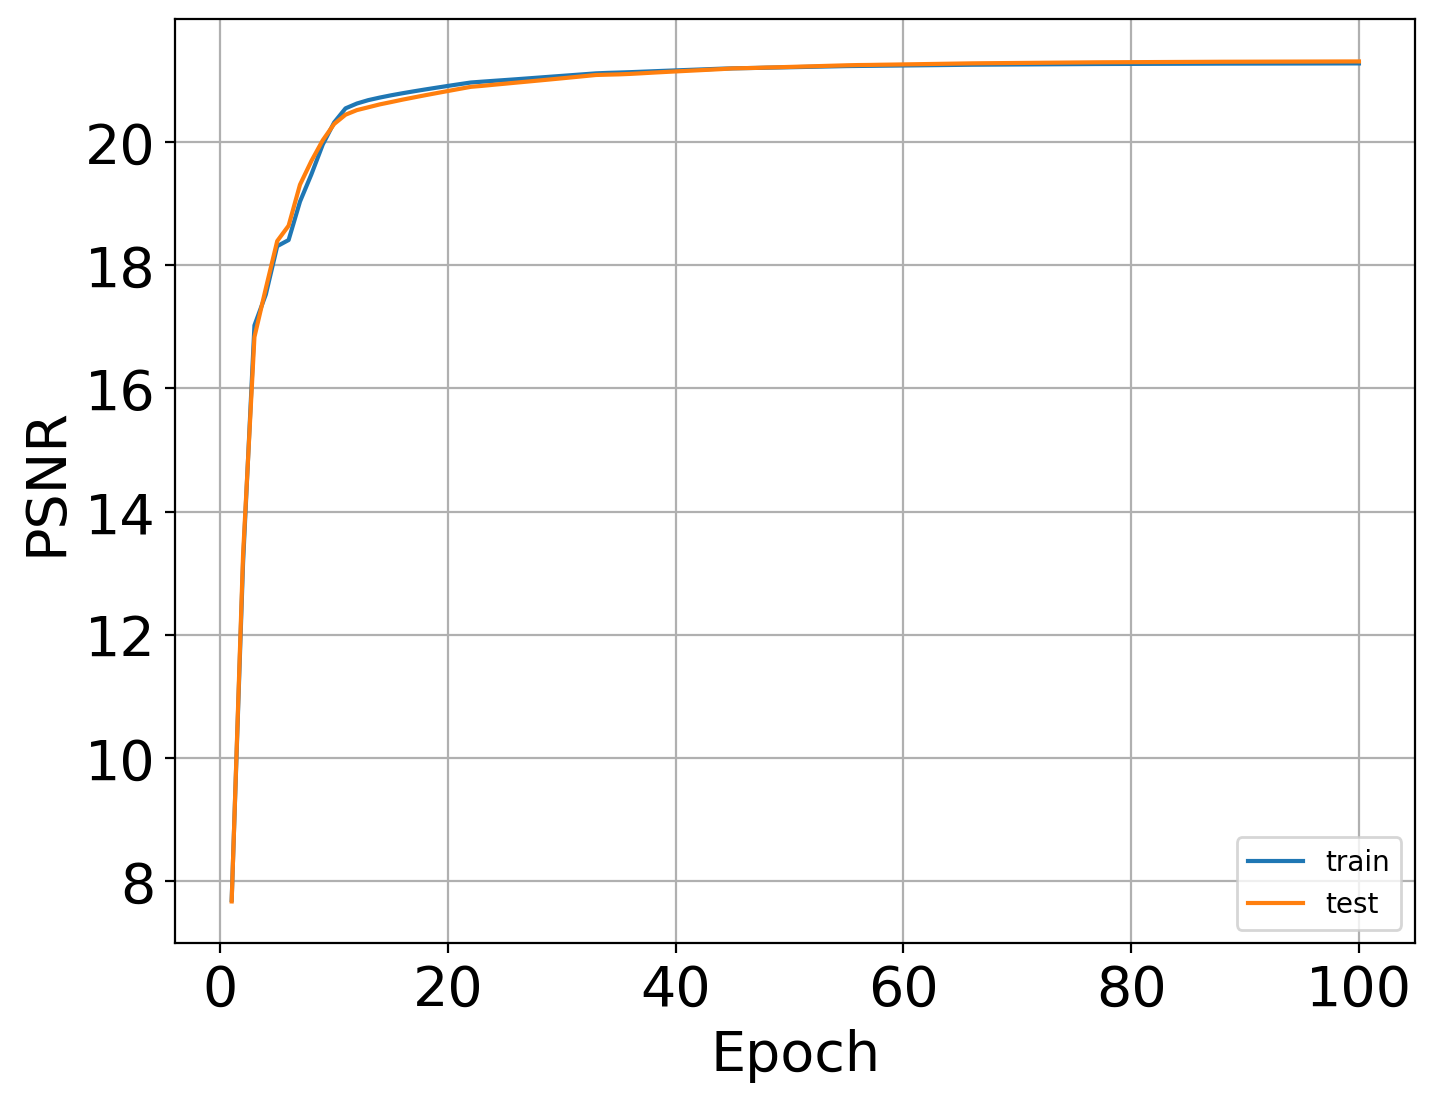

In [11]:
# learning rate
X, Y1, Y2, Y3 = [], [], [], []
for  item in metrics:
    epoch, learning_rate,  train_psnr, test_psnr = item
    X.append(epoch)
    Y1.append(learning_rate)
    Y2.append(train_psnr)
    Y3.append(test_psnr)


#figure parameters
size = 20

#plot the scatter plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=200)
# ax.plot(X, Y1, label="LR")
ax.plot(X, Y2, label="train")
ax.plot(X, Y3, label="test")

# ax.set_title("Comparing the tautomerization Gibbs free energies")
ax.set_ylabel(r"PSNR", fontsize=size)  #support latex representation
ax.set_xlabel(r"Epoch", fontsize=size)
plt.xticks(fontsize=size)  #visible x ticks
plt.yticks(fontsize=size)
ax.grid()
ax.legend()
# fig.savefig("any_path.png")

# Visualize the model

In [12]:
from model import Conv

In [13]:
model = Conv()
model.load_state_dict(torch.load("model_parameters.pt"))
model

Conv(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=5, stride=1, padding=2, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 3, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=5, stride=1, padding=2, dilation=1, ceil_mode=False)
)

In [14]:
blur = "/Users/liu5/Documents/10-617HW/project/data/test/blur_gamma/000001.png"
sharp = "/Users/liu5/Documents/10-617HW/project/data/test/sharp/000001.png"

In [ ]:
convertor = transforms.ToTensor()
img = Image.open(blur)
img_tensor = convertor(img)
img_tensor.shape

In [62]:
yhat = 255*model(img_tensor).detach().numpy()
print(yhat.shape)

(3, 720, 1280)


In [64]:
img = Image.fromarray((yhat*255).astype(np.uint8)).convert('RGB')
img

TypeError: Cannot handle this data type: (1, 1, 1280), |u1

# Convert an image into a tensor

In [ ]:
path = "/Users/liu5/Documents/10-617HW/project/GOPRO_Large/train/GOPR0372_07_00/sharp/000047.png"
img = Image.open(path)
img  #view image

In [4]:
convertor = transforms.ToTensor()
img_tensor = convertor(img)
print(img_tensor.shape)

torch.Size([3, 720, 1280])


In [5]:
img_tensor[0, :5, :5]

tensor([[0.4745, 0.4667, 0.4431, 0.4275, 0.4196],
        [0.4745, 0.4667, 0.4510, 0.4392, 0.4235],
        [0.4667, 0.4549, 0.4667, 0.4627, 0.4471],
        [0.4706, 0.4824, 0.4706, 0.4627, 0.4667],
        [0.4275, 0.4706, 0.4745, 0.4667, 0.4706]])

# Sequence to images

In [9]:
in_folder = "/Users/liu5/Documents/10-617HW/project/GOPRO_Large/train"
out_folder = "/Users/liu5/Documents/10-617HW/project/data/train"
# sub = "blur_gamma"  #X
sub = "sharp"  #Y


paths = os.path.join(in_folder, "*", sub, "*.png")
files = glob.glob(paths)
print("Total:",  len(files))
for file in files:
    basename = os.path.basename(file)
    destination = os.path.join(out_folder, sub, basename)
    shutil.copy(file, destination)

Total: 2103


In [11]:
in_folder = "/Users/liu5/Documents/10-617HW/project/GOPRO_Large/test"
out_folder = "/Users/liu5/Documents/10-617HW/project/data/test"
sub = "blur_gamma"  #X
# sub = "sharp"  #Y


paths = os.path.join(in_folder, "*", sub, "*.png")
files = glob.glob(paths)
print("Total:",  len(files))
for file in files:
    basename = os.path.basename(file)
    destination = os.path.join(out_folder, sub, basename)
    shutil.copy(file, destination)

Total: 1111
